# Import the required libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\PRIYAM\Desktop\Techno Hacks\Churn Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# First 5 rows

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Columns 

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Coverting the object type of "TotalCharges" into numeric

df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan, regex = True)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

<AxesSubplot:title={'center':'Churn'}>

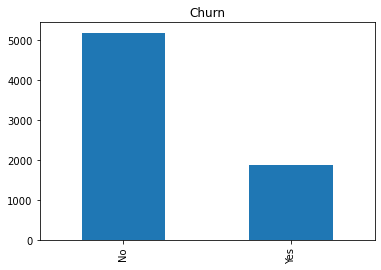

In [9]:
plt.title("Churn")
df["Churn"].value_counts().plot(kind='bar')

In [10]:
# Droping unnacessary column

df.drop("customerID", axis = 1, inplace = True )

In [11]:
# Duplicate rows

df.duplicated().sum()

22

In [12]:
# Droping duplicate rows

df = df.drop_duplicates(keep = "first")

In [13]:
cat_col = df.dtypes == object
list_cat_col = df.columns[cat_col].tolist()
list_cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [14]:
# Encoding the catagorical data into numeric data

df["gender"] = df["gender"].replace({"Male": 1, "Female":2})

df["Partner"] = df["Partner"].replace({"No": 1, "Yes":2})

df["Dependents"] = df["Dependents"].replace({"No": 1, "Yes":2})

df["PhoneService"] = df["PhoneService"].replace({"No": 1, "Yes":2})

df["MultipleLines"] = df["MultipleLines"].replace({"No": 1, "Yes":2, "No phone service":3})

df["InternetService"] = df["InternetService"].replace({"No": 1, "DSL":2, "Fiber optic":3})

df["OnlineSecurity"] = df["OnlineSecurity"].replace({"No": 1, "Yes":2, "No internet service":3})

df["OnlineBackup"] = df["OnlineBackup"].replace({"No": 1, "Yes":2, "No internet service":3})

df["DeviceProtection"] = df["DeviceProtection"].replace({"No": 1, "Yes":2, "No internet service":3})

df["TechSupport"] = df["TechSupport"].replace({"No": 1, "Yes":2, "No internet service":3})

df["StreamingTV"] = df["StreamingTV"].replace({"No": 1, "Yes":2, "No internet service":3})

df["StreamingMovies"] = df["StreamingMovies"].replace({"No": 1, "Yes":2, "No internet service":3})

df["Contract"] = df["Contract"].replace({"Month-to-month": 1, "Two year":2, "One year":3})

df["PaperlessBilling"] = df["PaperlessBilling"].replace({"No": 1, "Yes":2})

df["PaymentMethod"] = df["PaymentMethod"].replace({"Electronic check": 1, "Mailed check":2, "Bank transfer (automatic)":3, "Credit card (automatic)":4})

df["Churn"] = df["Churn"].replace({"No": 0, "Yes":1})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   InternetService   7021 non-null   int64  
 8   OnlineSecurity    7021 non-null   int64  
 9   OnlineBackup      7021 non-null   int64  
 10  DeviceProtection  7021 non-null   int64  
 11  TechSupport       7021 non-null   int64  
 12  StreamingTV       7021 non-null   int64  
 13  StreamingMovies   7021 non-null   int64  
 14  Contract          7021 non-null   int64  
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMethod     7021 non-null   int64  


<AxesSubplot:>

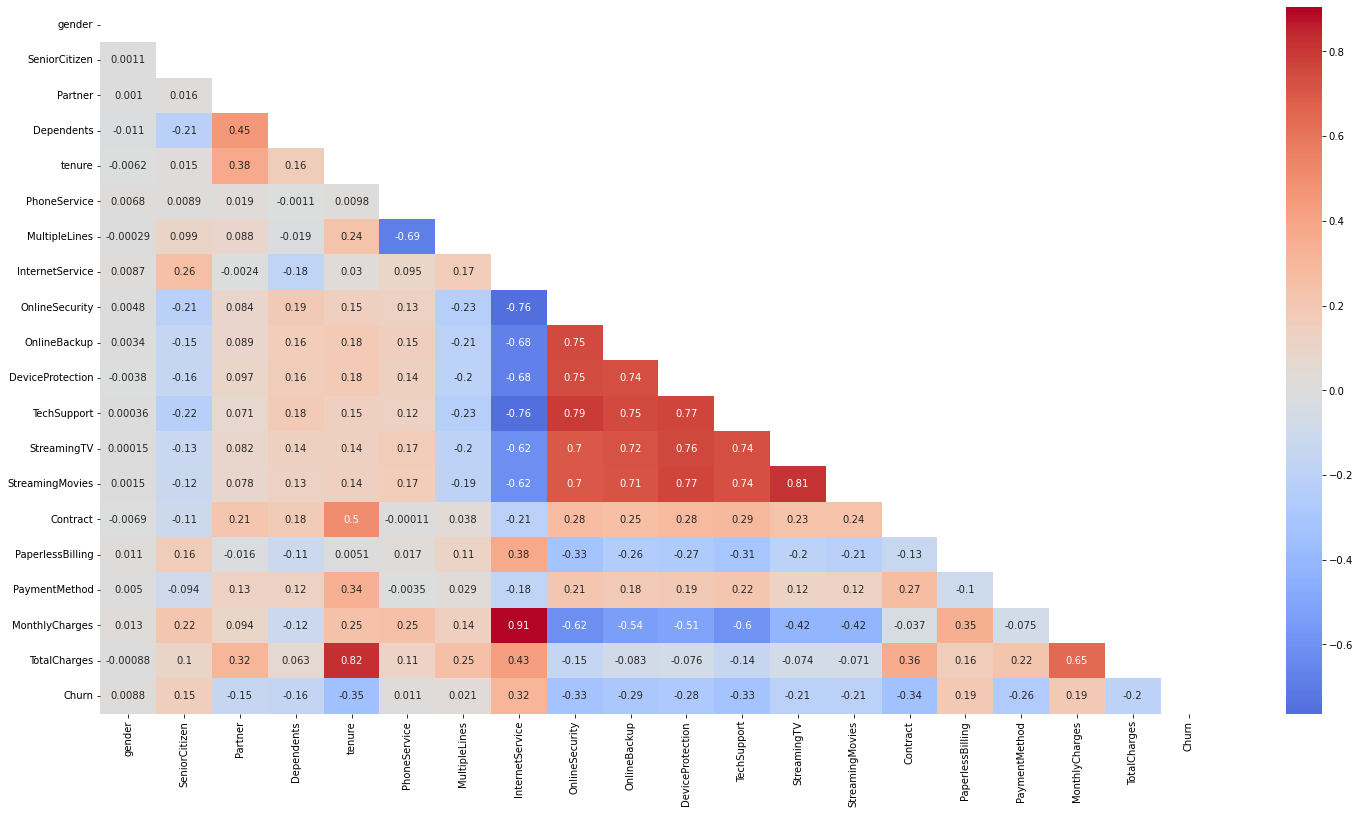

In [16]:
# Co-Relation HeatMap

mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(25,13))
sns.heatmap(df.corr(),cmap="coolwarm",mask = mask,center=0,annot=True,
            annot_kws={"fontsize":10})

In [17]:
df.corr()["Churn"].sort_values(ascending = False)

Churn               1.000000
InternetService     0.317464
MonthlyCharges      0.194508
PaperlessBilling    0.190891
SeniorCitizen       0.151619
MultipleLines       0.021373
PhoneService        0.011323
gender              0.008763
Partner            -0.149135
Dependents         -0.163459
TotalCharges       -0.198303
StreamingTV        -0.205022
StreamingMovies    -0.206533
PaymentMethod      -0.261892
DeviceProtection   -0.281312
OnlineBackup       -0.291349
TechSupport        -0.330149
OnlineSecurity     -0.333144
Contract           -0.341124
tenure             -0.351508
Name: Churn, dtype: float64

# Spliting values :

In [18]:
x = df.drop(columns = ["Churn"])
y = df["Churn"]

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 40)

In [20]:
from sklearn.preprocessing import StandardScaler

num_cols = ["tenure", 'MonthlyCharges','TotalCharges']
scaler = StandardScaler()

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])

In [21]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4114,2,0,2,2,0.761289,2,1,1,3,3,3,3,3,3,2,1,2,-1.485890,-0.550385
6469,1,0,1,1,0.109750,2,1,1,3,3,3,3,3,3,2,1,3,-1.436087,-0.693154
1614,1,0,2,1,1.412828,1,3,2,2,2,1,2,1,2,2,2,3,-0.456637,0.550504
4941,1,0,1,1,-1.193328,2,1,1,3,3,3,3,3,3,1,2,2,-1.490870,-0.979002
5995,1,0,2,2,1.616434,2,1,3,2,2,2,2,2,2,2,1,3,1.568666,2.542742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,1,0,2,2,0.598404,2,2,2,2,2,2,2,2,2,2,2,2,0.856490,0.902305
6324,2,0,2,2,-0.949001,2,1,3,1,1,1,2,1,1,1,2,1,0.370085,-0.718745
6165,1,1,1,1,-1.152607,2,1,3,1,1,1,1,1,1,1,2,1,0.197436,-0.874917
6378,1,0,2,2,-0.786116,2,1,3,2,1,1,1,1,2,1,1,1,0.642339,-0.520996


In [22]:
x_train[num_cols]

,tenure,MonthlyCharges,TotalCharges
4114,0.761289,-1.485890,-0.550385
6469,0.109750,-1.436087,-0.693154
1614,1.412828,-0.456637,0.550504
4941,-1.193328,-1.490870,-0.979002
5995,1.616434,1.568666,2.542742
...,...,...,...
3071,0.598404,0.856490,0.902305
6324,-0.949001,0.370085,-0.718745
6165,-1.152607,0.197436,-0.874917
6378,-0.786116,0.642339,-0.520996


# ML Model :

**KNN :**

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test, y_test)
print("KNN accuracy:",accuracy_knn )

KNN accuracy: 0.7446606549596583


In [31]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1569
           1       0.00      0.00      0.00       538

    accuracy                           0.74      2107
   macro avg       0.37      0.50      0.43      2107
weighted avg       0.55      0.74      0.64      2107



**THANK YOU**